# 

In [326]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", 100) 

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [327]:
case_obi = pd.read_csv('coursework_1_data_2019.csv')

In [328]:
case_obi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [329]:
case_obi.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [330]:
case_obi.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,"1,075.2961","1,159.5132","1,278.6053","340,922.3158","354,282.0921","368,289.4803",375.7961,401.5263,438.2763,"166,914.7500","171,990.6118","177,176.9803",699.5000,757.9868,840.3289,"174,007.5658","182,291.4803","191,112.5000","270,309.2105","59,368.4211","68,427.6316","25,111.8421","62,631.5789","32,967.1053","21,802.6316"
std,922.3787,997.2310,"1,069.6920","262,135.3866","278,874.4681","294,596.8620",323.5608,353.7565,376.4780,"128,635.2720","136,886.2596","145,624.8585",605.7556,654.4183,703.8875,"133,527.4995","142,585.6903","149,675.4815","210,461.7828","53,980.9488","62,114.9972","22,815.2817","55,056.1043","29,930.2540","19,832.4236"
min,5.0000,1.0000,4.0000,"2,200.0000","2,385.0000","2,440.0000",2.0000,0.0000,1.0000,"1,085.0000","1,305.0000","1,426.0000",3.0000,1.0000,3.0000,"1,115.0000","1,080.0000","1,014.0000","2,000.0000",0.0000,0.0000,0.0000,"2,000.0000",0.0000,0.0000
25%,493.5000,531.7500,592.5000,"189,474.7500","188,067.2500","193,428.5000",175.7500,183.2500,198.2500,"93,000.2500","90,270.5000","91,086.5000",305.0000,329.5000,372.7500,"95,983.7500","99,307.2500","101,902.7500","140,000.0000","26,000.0000","32,000.0000","11,750.0000","31,750.0000","14,000.0000","9,000.0000"
50%,729.0000,794.5000,873.5000,"254,092.5000","257,771.5000","264,203.5000",266.0000,271.0000,293.5000,"122,694.0000","121,755.0000","121,868.0000",460.5000,532.0000,570.5000,"128,675.5000","135,104.0000","140,668.5000","200,000.0000","41,500.0000","48,000.0000","18,000.0000","45,000.0000","25,000.0000","16,000.0000"
75%,"1,386.0000","1,470.2500","1,641.5000","375,122.5000","402,499.0000","409,428.5000",473.7500,519.2500,554.7500,"183,610.0000","189,826.0000","194,432.7500",886.5000,957.0000,"1,043.0000","191,395.5000","197,497.7500","213,147.7500","301,750.0000","70,000.0000","79,000.0000","26,500.0000","69,750.0000","39,750.0000","27,250.0000"
max,"5,065.0000","5,582.0000","5,745.0000","1,411,380.0000","1,528,154.0000","1,623,387.0000","1,762.0000","2,065.0000","2,000.0000","694,681.0000","754,646.0000","790,860.0000","3,303.0000","3,517.0000","3,745.0000","716,699.0000","773,508.0000","832,527.0000","1,170,000.0000","297,000.0000","333,000.0000","130,000.0000","340,000.0000","203,000.0000","99,000.0000"


In [331]:
case_obi['eight_case_rate'] = case_obi['2008_cases_total'] / case_obi['2008_pop_total'] * 100000
case_obi['thirteen_case_rate'] = case_obi['2013_cases_total'] / case_obi['2013_pop_total'] * 100000
case_obi['eighteen_case_rate'] = case_obi['2018_cases_total'] / case_obi['2018_pop_total'] * 100000


case_obi.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,eight_case_rate,thirteen_case_rate,eighteen_case_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough,343.4018,345.7521,419.7405
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough,158.3268,172.6433,217.1623
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,158.7617,184.8285,204.3562
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,255.2834,243.3878,260.9146
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,196.6052,198.4139,215.2960


In [332]:
case_obi['obi_growth_rate_first'] = (case_obi['thirteen_case_rate'] - case_obi['eight_case_rate'])/case_obi['eight_case_rate']
case_obi['obi_growth_rate_second'] = (case_obi['eighteen_case_rate'] - case_obi['thirteen_case_rate'])/case_obi['thirteen_case_rate']
case_obi['obi_growth_rate_all'] = (case_obi['eighteen_case_rate'] - case_obi['eight_case_rate'])/case_obi['eight_case_rate']
case_obi.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,eight_case_rate,thirteen_case_rate,eighteen_case_rate,obi_growth_rate_first,obi_growth_rate_second,obi_growth_rate_all
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough,343.4018,345.7521,419.7405,0.0068,0.2140,0.2223
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough,158.3268,172.6433,217.1623,0.0904,0.2579,0.3716
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,158.7617,184.8285,204.3562,0.1642,0.1057,0.2872
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,255.2834,243.3878,260.9146,-0.0466,0.0720,0.0221
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,196.6052,198.4139,215.2960,0.0092,0.0851,0.0951


In [333]:
case_obi['clean_air_pct'] = case_obi['clean_air'] / case_obi['total_budget'] * 100
case_obi['clean_environ_pct'] = case_obi['clean_environ'] / case_obi['total_budget'] * 100
case_obi['health_training_pct'] = case_obi['health_training'] / case_obi['total_budget'] * 100
case_obi['school_awareness_pct'] = case_obi['school_awareness'] / case_obi['total_budget'] * 100
case_obi['media_awareness_pct'] = case_obi['media_awareness'] / case_obi['total_budget'] * 100
case_obi['sub_counselling_pct'] = case_obi['sub_counselling'] / case_obi['total_budget'] * 100

case_obi.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,eight_case_rate,thirteen_case_rate,eighteen_case_rate,obi_growth_rate_first,obi_growth_rate_second,obi_growth_rate_all,clean_air_pct,clean_environ_pct,health_training_pct,school_awareness_pct,media_awareness_pct,sub_counselling_pct
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough,343.4018,345.7521,419.7405,0.0068,0.2140,0.2223,15.1079,15.8273,12.9496,29.4964,12.9496,13.6691
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough,158.3268,172.6433,217.1623,0.0904,0.2579,0.3716,22.7273,7.7273,10.4545,33.6364,13.6364,11.8182
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,158.7617,184.8285,204.3562,0.1642,0.1057,0.2872,25.6250,28.1250,3.1250,16.2500,18.1250,8.7500
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,255.2834,243.3878,260.9146,-0.0466,0.0720,0.0221,20.4969,26.0870,11.8012,31.0559,6.2112,4.3478
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,196.6052,198.4139,215.2960,0.0092,0.0851,0.0951,28.4615,40.0000,13.0769,6.1538,2.3077,10.0000


In [369]:
case_obi['clean_air_perpop'] = case_obi['clean_air'] / case_obi['2008_pop_total']
case_obi['clean_environ_perpop'] = case_obi['clean_environ'] / case_obi['2008_pop_total']
case_obi['health_training_perpop'] = case_obi['health_training'] / case_obi['2008_pop_total']
case_obi['school_awareness_perpop'] = case_obi['school_awareness'] / case_obi['2008_pop_total']
case_obi['media_awareness_perpop'] = case_obi['media_awareness'] / case_obi['2008_pop_total'] 
case_obi['sub_counselling_perpop'] = case_obi['sub_counselling'] / case_obi['2008_pop_total'] 

case_obi.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,eight_case_rate,thirteen_case_rate,eighteen_case_rate,obi_growth_rate_first,obi_growth_rate_second,obi_growth_rate_all,clean_air_pct,clean_environ_pct,health_training_pct,school_awareness_pct,media_awareness_pct,sub_counselling_pct,clean_air_perpop,clean_environ_perpop,health_training_perpop,school_awareness_perpop,media_awareness_perpop,sub_counselling_perpop
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough,343.4018,345.7521,419.7405,0.0068,0.2140,0.2223,15.1079,15.8273,12.9496,29.4964,12.9496,13.6691,0.1216,0.1274,0.1042,0.2374,0.1042,0.1100
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough,158.3268,172.6433,217.1623,0.0904,0.2579,0.3716,22.7273,7.7273,10.4545,33.6364,13.6364,11.8182,0.1469,0.0499,0.0676,0.2174,0.0881,0.0764
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,158.7617,184.8285,204.3562,0.1642,0.1057,0.2872,25.6250,28.1250,3.1250,16.2500,18.1250,8.7500,0.1808,0.1985,0.0221,0.1147,0.1279,0.0617
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority,255.2834,243.3878,260.9146,-0.0466,0.0720,0.0221,20.4969,26.0870,11.8012,31.0559,6.2112,4.3478,0.1847,0.2351,0.1064,0.2799,0.0560,0.0392
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority,196.6052,198.4139,215.2960,0.0092,0.0851,0.0951,28.4615,40.0000,13.0769,6.1538,2.3077,10.0000,0.2339,0.3287,0.1075,0.0506,0.0190,0.0822


In [370]:
sns.set_style("whitegrid")

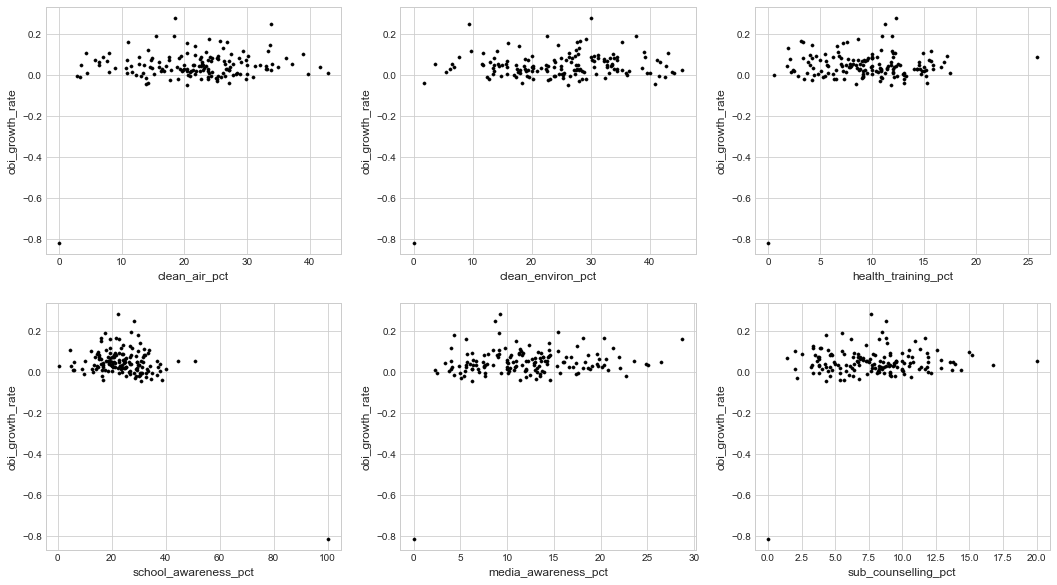

In [371]:


ax=fig, axes = plt.subplots(2, 3,  figsize=(18, 10))


axes[0,0].scatter(x = 'clean_air_pct', y='obi_growth_rate_first',color='black',s=10 ,data = case_obi)
axes[0,0].set_xlabel('clean_air_pct', labelpad = 5)
axes[0,0].set_ylabel('obi_growth_rate', labelpad = 5)

axes[0,1].scatter(x = 'clean_environ_pct', y='obi_growth_rate_first',color='black',s=10, data = case_obi)
axes[0,1].set_xlabel('clean_environ_pct', labelpad = 5)
axes[0,1].set_ylabel('obi_growth_rate', labelpad = 5)

axes[0,2].scatter(x = 'health_training_pct', y='obi_growth_rate_first',color='black',s=10, data = case_obi)
axes[0,2].set_xlabel('health_training_pct', labelpad = 5)
axes[0,2].set_ylabel('obi_growth_rate', labelpad = 5)

axes[1,0].scatter(x = 'school_awareness_pct', y='obi_growth_rate_first',color='black',s=10, data = case_obi)
axes[1,0].set_xlabel('school_awareness_pct', labelpad = 5)
axes[1,0].set_ylabel('obi_growth_rate', labelpad = 5)

axes[1,1].scatter(x = 'media_awareness_pct', y='obi_growth_rate_first',color='black',s=10, data = case_obi)
axes[1,1].set_xlabel('media_awareness_pct', labelpad = 5)
axes[1,1].set_ylabel('obi_growth_rate', labelpad = 5)

axes[1,2].scatter(x = 'sub_counselling_pct', y='obi_growth_rate_first',color='black',s=10, data = case_obi)
axes[1,2].set_xlabel('sub_counselling_pct', labelpad = 5)
axes[1,2].set_ylabel('obi_growth_rate', labelpad = 5)


plt.show()


In [384]:

case_obi.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,eight_case_rate,thirteen_case_rate,eighteen_case_rate,obi_growth_rate_first,obi_growth_rate_second,obi_growth_rate_all,clean_air_pct,clean_environ_pct,health_training_pct,school_awareness_pct,media_awareness_pct,sub_counselling_pct,clean_air_perpop,clean_environ_perpop,health_training_perpop,school_awareness_perpop,media_awareness_perpop,sub_counselling_perpop
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,"1,075.2961","1,159.5132","1,278.6053","340,922.3158","354,282.0921","368,289.4803",375.7961,401.5263,438.2763,"166,914.7500","171,990.6118","177,176.9803",699.5000,757.9868,840.3289,"174,007.5658","182,291.4803","191,112.5000","270,309.2105","59,368.4211","68,427.6316","25,111.8421","62,631.5789","32,967.1053","21,802.6316",309.7253,320.9778,344.6729,0.0434,0.1039,0.1366,21.6027,24.9144,9.4759,24.0846,12.1082,7.8141,0.1781,0.2019,0.0781,0.2012,0.0971,0.0625
std,922.3787,997.2310,"1,069.6920","262,135.3866","278,874.4681","294,596.8620",323.5608,353.7565,376.4780,"128,635.2720","136,886.2596","145,624.8585",605.7556,654.4183,703.8875,"133,527.4995","142,585.6903","149,675.4815","210,461.7828","53,980.9488","62,114.9972","22,815.2817","55,056.1043","29,930.2540","19,832.4236",137.0580,139.0960,138.7122,0.0887,0.2449,0.1223,8.3303,9.6471,4.1504,10.2344,5.5026,3.3038,0.1019,0.0916,0.0504,0.1550,0.0442,0.0267
min,5.0000,1.0000,4.0000,"2,200.0000","2,385.0000","2,440.0000",2.0000,0.0000,1.0000,"1,085.0000","1,305.0000","1,426.0000",3.0000,1.0000,3.0000,"1,115.0000","1,080.0000","1,014.0000","2,000.0000",0.0000,0.0000,0.0000,"2,000.0000",0.0000,0.0000,74.0036,41.9287,101.3876,-0.8155,-0.2173,-0.2787,0.0000,0.0000,0.0000,0.5367,0.0000,0.0000,0.0000,0.0000,0.0000,0.0047,0.0000,0.0000
25%,493.5000,531.7500,592.5000,"189,474.7500","188,067.2500","193,428.5000",175.7500,183.2500,198.2500,"93,000.2500","90,270.5000","91,086.5000",305.0000,329.5000,372.7500,"95,983.7500","99,307.2500","101,902.7500","140,000.0000","26,000.0000","32,000.0000","11,750.0000","31,750.0000","14,000.0000","9,000.0000",214.8408,226.8856,253.5392,0.0120,0.0296,0.0591,16.1875,18.0071,6.6379,18.7292,7.6771,5.3807,0.1247,0.1420,0.0495,0.1411,0.0631,0.0429
50%,729.0000,794.5000,873.5000,"254,092.5000","257,771.5000","264,203.5000",266.0000,271.0000,293.5000,"122,694.0000","121,755.0000","121,868.0000",460.5000,532.0000,570.5000,"128,675.5000","135,104.0000","140,668.5000","200,000.0000","41,500.0000","48,000.0000","18,000.0000","45,000.0000","25,000.0000","16,000.0000",291.4524,298.4833,318.2072,0.0396,0.0708,0.0995,22.5469,25.3175,9.5011,23.6200,11.7949,7.8333,0.1717,0.2077,0.0753,0.1864,0.0953,0.0619
75%,"1,386.0000","1,470.2500","1,641.5000","375,122.5000","402,499.0000","409,428.5000",473.7500,519.2500,554.7500,"183,610.0000","189,826.0000","194,432.7500",886.5000,957.0000,"1,043.0000","191,395.5000","197,497.7500","213,147.7500","301,750.0000","70,000.0000","79,000.0000","26,500.0000","69,750.0000","39,750.0000","27,250.0000",365.0282,381.0658,406.7039,0.0764,0.1229,0.2040,26.8252,32.1841,12.0627,29.5682,15.3521,9.6875,0.2140,0.2501,0.0966,0.2287,0.1202,0.0770
max,"5,065.0000","5,582.0000","5,745.0000","1,411,380.0000","1,528,154.0000","1,623,387.0000","1,762.0000","2,065.0000","2,000.0000","694,681.0000","754,646.0000","790,860.0000

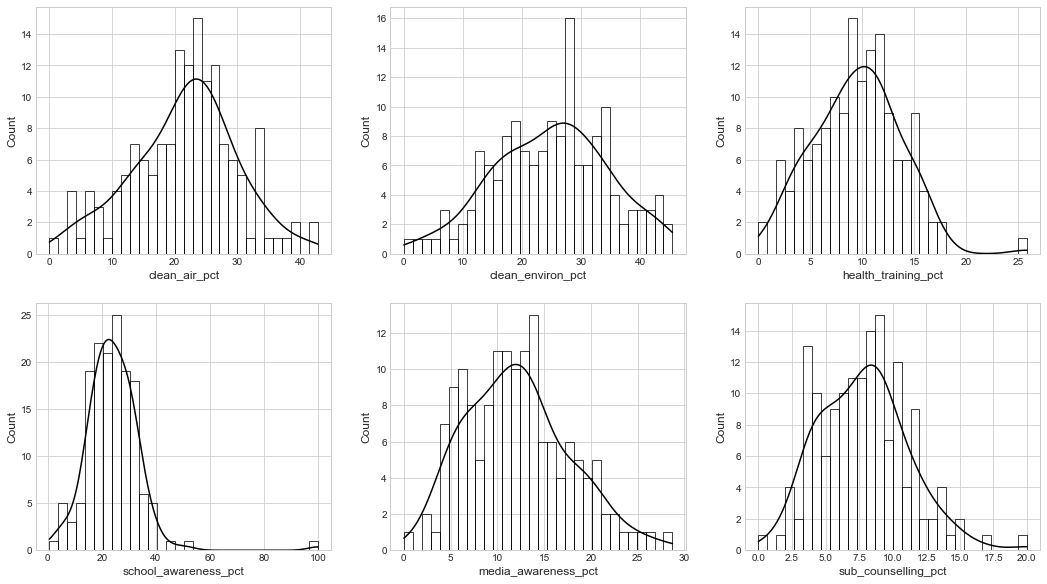

In [372]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(case_obi['clean_air_pct'],color='black', bins=30,fill=False,kde=True,ax=axes[0,0])
sns.histplot(case_obi['clean_environ_pct'],color='black', bins=30,fill=False,kde=True,ax=axes[0,1])
sns.histplot(case_obi['health_training_pct'],color='black', bins=30,fill=False,kde=True,ax=axes[0,2])
sns.histplot(case_obi['school_awareness_pct'],color='black', bins=30,fill=False,kde=True,ax=axes[1,0])
sns.histplot(case_obi['media_awareness_pct'],color='black', bins=30,fill=False,kde=True,ax=axes[1,1])
sns.histplot(case_obi['sub_counselling_pct'],color='black', bins=30,fill=False,kde=True,ax=axes[1,2])

plt.show()



In [373]:

case_obi_01 = pd.DataFrame(case_obi,columns=['clean_air_pct' ,'clean_environ_pct', 'health_training_pct','school_awareness_pct','media_awareness_pct','sub_counselling_pct'])

corrMatrix = case_obi_01.corr()
print (corrMatrix)

                                                clean_air_pct  \
clean_air_pct                                          1.0000   
clean_environ_pct                                     -0.2481   
health_training_pct                                   -0.1092   
school_awareness_pct                                  -0.3769   
media_awareness_pct                                   -0.2263   
sub_counselling_pct                                   -0.1155   

                                            clean_environ_pct  \
clean_air_pct                                         -0.2481   
clean_environ_pct                                      1.0000   
health_training_pct                                   -0.1025   
school_awareness_pct                                  -0.5337   
media_awareness_pct                                   -0.1924   
sub_counselling_pct                                   -0.1920   

                                          health_training_pct  \
clean_air_pct          

In [374]:

case_obi_02 = pd.DataFrame(case_obi,columns=['clean_air_perpop' ,'clean_environ_perpop', 'health_training_perpop','school_awareness_perpop','media_awareness_perpop','sub_counselling_perpop'])

corrMatrix = case_obi_02.corr()
print (corrMatrix)

                                                clean_air_perpop  \
clean_air_perpop                                          1.0000   
clean_environ_perpop                                      0.2628   
health_training_perpop                                    0.5242   
school_awareness_perpop                                   0.4746   
media_awareness_perpop                                    0.0089   
sub_counselling_perpop                                    0.0216   

                                            clean_environ_perpop  \
clean_air_perpop                                          0.2628   
clean_environ_perpop                                      1.0000   
health_training_perpop                                    0.3478   
school_awareness_perpop                                   0.2018   
media_awareness_perpop                                   -0.0318   
sub_counselling_perpop                                   -0.0592   

                                          heal

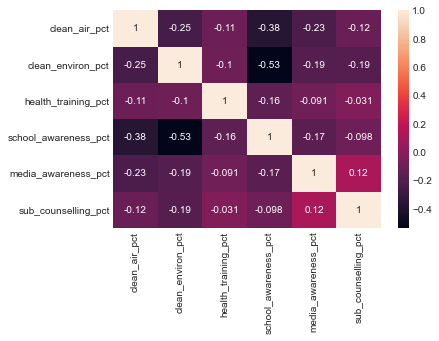

In [375]:
corrMatrix = case_obi_01.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

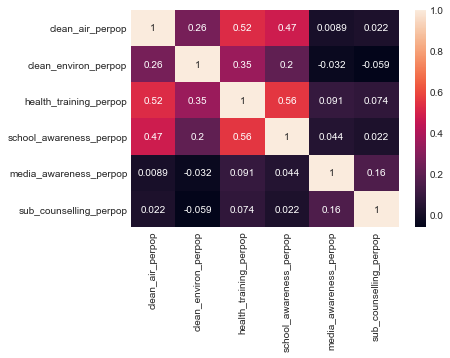

In [376]:
corrMatrix = case_obi_02.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [377]:
plt.style.use('seaborn-whitegrid')

In [378]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  


predictors_selected_VIF1 = case_obi[['clean_air_pct', 'clean_environ_pct', 'health_training_pct','school_awareness_pct','media_awareness_pct','sub_counselling_pct']]

vif_data = pd.DataFrame()
vif_data["feature"] = predictors_selected_VIF.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(predictors_selected_VIF.values, i)
                          for i in range(len(predictors_selected_VIF.columns))]
  
print(vif_data)

                feature                                      VIF
0         clean_air_pct                                   5.0500
1     clean_environ_pct                                   4.8373
2   health_training_pct                                   5.1721
3  school_awareness_pct                                   4.2255
4   media_awareness_pct                                   4.8999
5   sub_counselling_pct                                   5.9092


In [379]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  


predictors_selected_VIF2 = case_obi[['clean_air_perpop', 'clean_environ_perpop', 'health_training_perpop','school_awareness_perpop','media_awareness_perpop','sub_counselling_perpop']]

vif_data = pd.DataFrame()
vif_data["feature"] = predictors_selected_VIF2.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(predictors_selected_VIF2.values, i)
                          for i in range(len(predictors_selected_VIF2.columns))]
  
print(vif_data)

                   feature                                      VIF
0         clean_air_perpop                                   5.7942
1     clean_environ_perpop                                   5.2591
2   health_training_perpop                                   6.1102
3  school_awareness_perpop                                   4.1666
4   media_awareness_perpop                                   4.7910
5   sub_counselling_perpop                                   4.9742


In [380]:
model_0813growth_budgetperpop = sm.formula.ols('obi_growth_rate_first ~ clean_air_perpop + clean_environ_perpop + health_training_perpop +school_awareness_perpop + media_awareness_perpop + sub_counselling_perpop', case_obi).fit()
model_0813growth_budgetperpop.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     obi_growth_rate_first   R-squared:                       0.318
Model:                               OLS   Adj. R-squared:                  0.290
Method:                    Least Squares   F-statistic:                     11.28
Date:                   Sun, 14 Nov 2021   Prob (F-statistic):           2.55e-10
Time:                           10:31:54   Log-Likelihood:                 182.16
No. Observations:                    152   AIC:                            -350.3
Df Residuals:                        145   BIC:                            -329.2
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0366      0.025     -1.462      0.146      -0.086       0.013
clean_air_perpop            0.2179      0.073      2.986      0.003       0.074       0.362
clean_environ_perpop        0.1318      0.072      1.841      0.068      -0.010       0.273
health_training_perpop      0.3601      0.162      2.228      0.027       0.041       0.679
school_awareness_perpop    -0.3522      0.049     -7.201      0.000      -0.449      -0.256
media_awareness_perpop      0.3570      0.140      2.546      0.012       0.080       0.634
sub_counselling_perpop      0.3630      0.232      1.563      0.120      -0.096       0.822
==============================================================================
Omnibus:                       62.216   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              641.620
Skew:                          -1.104   Prob(JB):                    4.72e-140
Kurtosis:                      12.820   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
model_0813growth_budgetperpop_stepwise = sm.formula.ols('obi_growth_rate_first ~ clean_air_perpop + health_training_perpop +school_awareness_perpop + media_awareness_perpop + sub_counselling_perpop', case_obi).fit()
model_0813growth_budgetperpop_stepwise.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     obi_growth_rate_first   R-squared:                       0.302
Model:                               OLS   Adj. R-squared:                  0.278
Method:                    Least Squares   F-statistic:                     12.65
Date:                   Mon, 15 Nov 2021   Prob (F-statistic):           3.24e-10
Time:                           12:14:42   Log-Likelihood:                 180.40
No. Observations:                    152   AIC:                            -348.8
Df Residuals:                        146   BIC:                            -330.7
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0144      0.022     -0.651      0.516      -0.058       0.029
clean_air_perpop            0.2311      0.073      3.157      0.002       0.086       0.376
health_training_perpop      0.4345      0.158      2.755      0.007       0.123       0.746
school_awareness_perpop    -0.3538      0.049     -7.176      0.000      -0.451      -0.256
media_awareness_perpop      0.3438      0.141      2.436      0.016       0.065       0.623
sub_counselling_perpop      0.3284      0.233      1.407      0.162      -0.133       0.790
==============================================================================
Omnibus:                       70.239   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.282
Skew:                          -1.274   Prob(JB):                    1.12e-176
Kurtosis:                      14.020   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [392]:
model_0813growth_budgetperpop_4predictors = sm.formula.ols('obi_growth_rate_first ~ clean_air_perpop  + health_training_perpop +school_awareness_perpop + media_awareness_perpop ', case_obi).fit()
model_0813growth_budgetperpop_4predictors.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     obi_growth_rate_first   R-squared:                       0.293
Model:                               OLS   Adj. R-squared:                  0.274
Method:                    Least Squares   F-statistic:                     15.22
Date:                   Mon, 15 Nov 2021   Prob (F-statistic):           1.96e-10
Time:                           12:14:50   Log-Likelihood:                 179.38
No. Observations:                    152   AIC:                            -348.8
Df Residuals:                        147   BIC:                            -333.6
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0026      0.019      0.138      0.891      -0.034       0.039
clean_air_perpop            0.2303      0.073      3.135      0.002       0.085       0.375
health_training_perpop      0.4482      0.158      2.837      0.005       0.136       0.760
school_awareness_perpop    -0.3552      0.049     -7.181      0.000      -0.453      -0.257
media_awareness_perpop      0.3738      0.140      2.670      0.008       0.097       0.651
==============================================================================
Omnibus:                       76.816   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.442
Skew:                          -1.412   Prob(JB):                    2.07e-213
Kurtosis:                      15.111   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [382]:
model_1318growth_budgetperpop = sm.formula.ols('obi_growth_rate_second ~ clean_air_perpop + clean_environ_perpop + health_training_perpop +school_awareness_perpop + media_awareness_perpop + sub_counselling_perpop', case_obi).fit()
model_1318growth_budgetperpop.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     obi_growth_rate_second   R-squared:                       0.377
Model:                                OLS   Adj. R-squared:                  0.351
Method:                     Least Squares   F-statistic:                     14.60
Date:                    Sun, 14 Nov 2021   Prob (F-statistic):           5.37e-13
Time:                            10:32:23   Log-Likelihood:                 34.588
No. Observations:                     152   AIC:                            -55.18
Df Residuals:                         145   BIC:                            -34.01
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.3688      0.066      5.579      0.000       0.238       0.499
clean_air_perpop           -0.7517      0.193     -3.902      0.000      -1.132      -0.371
clean_environ_perpop       -0.3410      0.189     -1.804      0.073      -0.715       0.033
health_training_perpop     -1.3679      0.427     -3.206      0.002      -2.211      -0.525
school_awareness_perpop     1.0320      0.129      7.991      0.000       0.777       1.287
media_awareness_perpop     -0.6982      0.370     -1.886      0.061      -1.430       0.033
sub_counselling_perpop     -1.5230      0.613     -2.483      0.014      -2.735      -0.311
==============================================================================
Omnibus:                      165.487   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5929.105
Skew:                           3.852   Prob(JB):                         0.00
Kurtosis:                      32.611   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
model_0818growth_budgetperpop = sm.formula.ols('obi_growth_rate_all ~ clean_air_perpop + clean_environ_perpop + health_training_perpop +school_awareness_perpop + media_awareness_perpop + sub_counselling_perpop', case_obi).fit()
model_0818growth_budgetperpop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     obi_growth_rate_all   R-squared:                       0.079
Model:                             OLS   Adj. R-squared:                  0.041
Method:                  Least Squares   F-statistic:                     2.073
Date:                 Sun, 14 Nov 2021   Prob (F-statistic):             0.0599
Time:                         10:32:32   Log-Likelihood:                 110.44
No. Observations:                  152   AIC:                            -206.9
Df Residuals:                      145   BIC:                            -185.7
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.1074      0.040      2.676      0.008       0.028       0.187
clean_air_perpop           -0.0118      0.117     -0.101      0.920      -0.243       0.219
clean_environ_perpop        0.1390      0.115      1.211      0.228      -0.088       0.366
health_training_perpop      0.1050      0.259      0.405      0.686      -0.407       0.617
school_awareness_perpop    -0.2093      0.078     -2.670      0.008      -0.364      -0.054
media_awareness_perpop      0.3714      0.225      1.653      0.101      -0.073       0.816
sub_counselling_perpop      0.0170      0.372      0.046      0.964      -0.719       0.753
==============================================================================
Omnibus:                       36.611   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.898
Skew:                           1.184   Prob(JB):                     5.97e-14
Kurtosis:                       5.002   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
model_0813growth_budgetrate = sm.formula.ols('obi_growth_rate_first ~ clean_air_pct + clean_environ_pct + health_training_pct +school_awareness_pct + media_awareness_pct + sub_counselling_pct ', case_obi).fit()
model_0813growth_budgetrate.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     obi_growth_rate_first   R-squared:                       0.306
Model:                               OLS   Adj. R-squared:                  0.282
Method:                    Least Squares   F-statistic:                     12.85
Date:                   Sun, 14 Nov 2021   Prob (F-statistic):           2.33e-10
Time:                           02:47:26   Log-Likelihood:                 180.77
No. Observations:                    152   AIC:                            -349.5
Df Residuals:                        146   BIC:                            -331.4
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.756e-05   1.27e-05      5.331      0.000    4.25e-05    9.26e-05
clean_air_pct            0.0013      0.001      2.209      0.029       0.000       0.002
clean_environ_pct        0.0007      0.001      1.389      0.167      -0.000       0.002
health_training_pct      0.0023      0.001      1.683      0.095      -0.000       0.005
school_awareness_pct    -0.0034      0.000     -7.003      0.000      -0.004      -0.002
media_awareness_pct      0.0027      0.001      2.625      0.010       0.001       0.005
sub_counselling_pct      0.0032      0.002      1.823      0.070      -0.000       0.007
==============================================================================
Omnibus:                       70.261   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.212
Skew:                          -1.264   Prob(JB):                    1.94e-181
Kurtosis:                      14.181   Cond. No.                     4.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [350]:
model_1318growth_budgetrate = sm.formula.ols('obi_growth_rate_second ~ clean_air_pct + clean_environ_pct + health_training_pct +school_awareness_pct + media_awareness_pct + sub_counselling_pct ', case_obi).fit()
model_1318growth_budgetrate.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     obi_growth_rate_second   R-squared:                       0.329
Model:                                OLS   Adj. R-squared:                  0.306
Method:                     Least Squares   F-statistic:                     14.31
Date:                    Sun, 14 Nov 2021   Prob (F-statistic):           2.13e-11
Time:                            02:48:25   Log-Likelihood:                 28.994
No. Observations:                     152   AIC:                            -45.99
Df Residuals:                         146   BIC:                            -27.84
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.998e-05   3.44e-05     -2.034      0.044      -0.000   -1.99e-06
clean_air_pct           -0.0023      0.002     -1.401      0.163      -0.005       0.001
clean_environ_pct        0.0009      0.001      0.669      0.505      -0.002       0.004
health_training_pct     -0.0064      0.004     -1.752      0.082      -0.014       0.001
school_awareness_pct     0.0119      0.001      9.150      0.000       0.009       0.014
media_awareness_pct     -0.0021      0.003     -0.755      0.452      -0.008       0.003
sub_counselling_pct     -0.0091      0.005     -1.919      0.057      -0.018       0.000
==============================================================================
Omnibus:                      175.697   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7731.463
Skew:                           4.162   Prob(JB):                         0.00
Kurtosis:                      36.933   Cond. No.                     4.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 1.0, 'Histogram of the residuals')

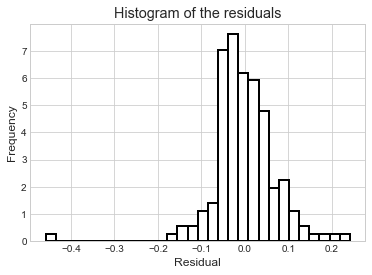

In [390]:
plt.hist(model_0813growth_budgetperpop.resid, density=True, color='white', bins=30,edgecolor='black',linewidth=2)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Residual');
plt.title('Histogram of the residuals')

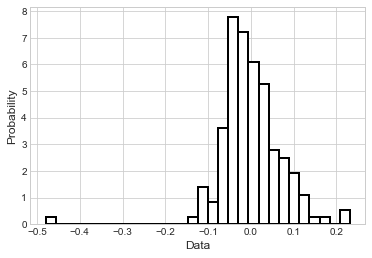

In [388]:
plt.hist(model_0813growth_budgetrate.resid, density=True, color='white', bins=30,edgecolor='black',linewidth=2)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

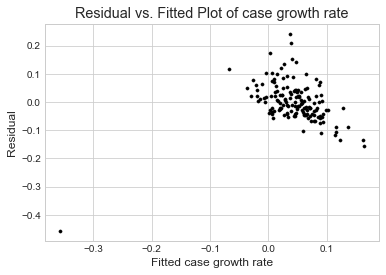

In [385]:
# plot 
plt.scatter(model_0813growth_budgetperpop.fittedvalues, model_0813growth_budgetperpop.resid,color='black',s=10)
# adding title and labels
plt.xlabel('Fitted case growth rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of case growth rate')
plt.show()


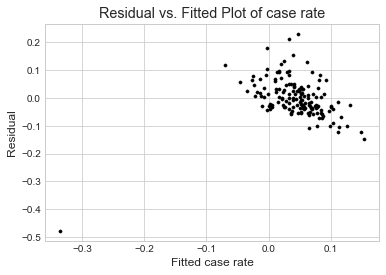

In [355]:
# plot 
plt.scatter(model_0813growth_budgetrate.fittedvalues, model_0813growth_budgetrate.resid,color='black',s=10)
# adding title and labels
plt.xlabel('Fitted case rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of case rate')
plt.show()




In [357]:
case_obi.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,eight_case_rate,thirteen_case_rate,eighteen_case_rate,obi_growth_rate_first,obi_growth_rate_second,obi_growth_rate_all,clean_air_pct,clean_environ_pct,health_training_pct,school_awareness_pct,media_awareness_pct,sub_counselling_pct,clean_air_perpop,clean_environ_perpop,health_training_perpop,school_awareness_perpop,media_awareness_perpop,sub_counselling_perpop
count,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000,152.0000
mean,"1,075.2961","1,159.5132","1,278.6053","340,922.3158","354,282.0921","368,289.4803",375.7961,401.5263,438.2763,"166,914.7500","171,990.6118","177,176.9803",699.5000,757.9868,840.3289,"174,007.5658","182,291.4803","191,112.5000","270,309.2105","59,368.4211","68,427.6316","25,111.8421","62,631.5789","32,967.1053","21,802.6316",309.7253,320.9778,344.6729,0.0434,0.1039,0.1366,21.6027,24.9144,9.4759,24.0846,12.1082,7.8141,70.7638,81.1053,31.5305,81.3482,37.1968,23.9730
std,922.3787,997.2310,"1,069.6920","262,135.3866","278,874.4681","294,596.8620",323.5608,353.7565,376.4780,"128,635.2720","136,886.2596","145,624.8585",605.7556,654.4183,703.8875,"133,527.4995","142,585.6903","149,675.4815","210,461.7828","53,980.9488","62,114.9972","22,815.2817","55,056.1043","29,930.2540","19,832.4236",137.0580,139.0960,138.7122,0.0887,0.2449,0.1223,8.3303,9.6471,4.1504,10.2344,5.5026,3.3038,68.7153,65.5828,35.0377,107.9955,23.5005,14.5081
min,5.0000,1.0000,4.0000,"2,200.0000","2,385.0000","2,440.0000",2.0000,0.0000,1.0000,"1,085.0000","1,305.0000","1,426.0000",3.0000,1.0000,3.0000,"1,115.0000","1,080.0000","1,014.0000","2,000.0000",0.0000,0.0000,0.0000,"2,000.0000",0.0000,0.0000,74.0036,41.9287,101.3876,-0.8155,-0.2173,-0.2787,0.0000,0.0000,0.0000,0.5367,0.0000,0.0000,0.0000,0.0000,0.0000,3.0395,0.0000,0.0000
25%,493.5000,531.7500,592.5000,"189,474.7500","188,067.2500","193,428.5000",175.7500,183.2500,198.2500,"93,000.2500","90,270.5000","91,086.5000",305.0000,329.5000,372.7500,"95,983.7500","99,307.2500","101,902.7500","140,000.0000","26,000.0000","32,000.0000","11,750.0000","31,750.0000","14,000.0000","9,000.0000",214.8408,226.8856,253.5392,0.0120,0.0296,0.0591,16.1875,18.0071,6.6379,18.7292,7.6771,5.3807,35.7780,41.6796,16.0627,43.0569,20.8168,13.3810
50%,729.0000,794.5000,873.5000,"254,092.5000","257,771.5000","264,203.5000",266.0000,271.0000,293.5000,"122,694.0000","121,755.0000","121,868.0000",460.5000,532.0000,570.5000,"128,675.5000","135,104.0000","140,668.5000","200,000.0000","41,500.0000","48,000.0000","18,000.0000","45,000.0000","25,000.0000","16,000.0000",291.4524,298.4833,318.2072,0.0396,0.0708,0.0995,22.5469,25.3175,9.5011,23.6200,11.7949,7.8333,62.2794,63.5451,25.2130,64.5175,32.0157,21.6467
75%,"1,386.0000","1,470.2500","1,641.5000","375,122.5000","402,499.0000","409,428.5000",473.7500,519.2500,554.7500,"183,610.0000","189,826.0000","194,432.7500",886.5000,957.0000,"1,043.0000","191,395.5000","197,497.7500","213,147.7500","301,750.0000","70,000.0000","79,000.0000","26,500.0000","69,750.0000","39,750.0000","27,250.0000",365.0282,381.0658,406.7039,0.0764,0.1229,0.2040,26.8252,32.1841,12.0627,29.5682,15.3521,9.6875,84.6667,100.5071,38.0855,91.1674,47.5292,32.3041
max,"5,065.0000","5,582.0000","5,745.0000","1,411,380.0000","1,528,154.0000","1,623,387.0000","1,762.0000","2,065.0000","2,000.0000","694,681.00

------------------------------------------
Print the model:
clean_air_pct : 0.010269561772486445
clean_environ_pct : -0.00976165566155698
health_training_pct : 0.02327562366117308
school_awareness_pct : -0.018861944211874506
media_awareness_pct : 0.04793888770213258
sub_counselling_pct : 0.007052558263583473
------------------------------------------
Accuracy of the model is: 0.6447368421052632
The confusion matrix is:


/Users/xuanshi/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

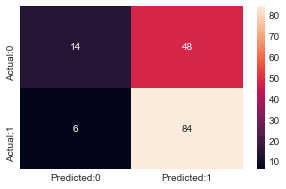

In [359]:
# If daily rental is larger than 4500, it is of Class 'True'. Otherwise, it is in Class 'False'.
threshold_growth_rate = 0.03

X1 = predictors_selected_VIF1
y1 = case_obi[['obi_growth_rate_first']] > threshold_growth_rate
###################

logreg = LogisticRegression()
logreg.fit(X1, y1)
y_pred1=logreg.predict(X1)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X1.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(y1,y_pred1)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y1,y_pred1)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sn.heatmap(conf_matrix, annot=True,fmt='d')

------------------------------------------
Print the model:
clean_air_perpop : 0.005262565635247762
clean_environ_perpop : -0.0035452927951347035
health_training_perpop : 0.00301246717431119
school_awareness_perpop : -0.006028514868661544
media_awareness_perpop : 0.017995779827608013
sub_counselling_perpop : 0.020011592324545528
------------------------------------------
Accuracy of the model is: 0.6513157894736842
The confusion matrix is:


/Users/xuanshi/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

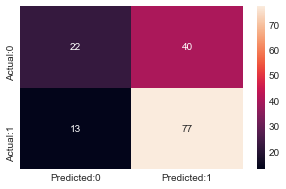

In [360]:
# If daily rental is larger than 4500, it is of Class 'True'. Otherwise, it is in Class 'False'.
threshold_growth_rate = 0.03

X2 = predictors_selected_VIF2
y2 = case_obi[['obi_growth_rate_first']] > threshold_growth_rate
###################

logreg = LogisticRegression()
logreg.fit(X2, y2)
y_pred2=logreg.predict(X2)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X2.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")
    
acc = sklearn.metrics.accuracy_score(y2,y_pred2)
print("Accuracy of the model is: " + str(acc))

# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y2,y_pred2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,3))
sn.heatmap(conf_matrix, annot=True,fmt='d')

In [366]:

    import statsmodels.api as sm

  
    X3 = predictors_selected_VIF2
    y3 = case_obi[['obi_growth_rate_first']]


    def stepwise_selection(X3, y3, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X3.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y3, sm.add_constant(pd.DataFrame(X3[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y3, sm.add_constant(pd.DataFrame(X3[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

    result = stepwise_selection(X3, y3)

    print('resulting features:')
    print(result)


#  [1]: http://planspace.org/20150423-forward_selection_with_statsmodels/
 # [2]: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

Add  media_awareness_perpop         with p-value 0.000233037
Add  school_awareness_perpop        with p-value 9.82337e-05
Add  clean_air_perpop               with p-value 1.41179e-07
Add  health_training_perpop         with p-value 0.00071409
Add  sub_counselling_perpop         with p-value 0.00900435
resulting features:
['media_awareness_perpop', 'school_awareness_perpop', 'clean_air_perpop', 'health_training_perpop', 'sub_counselling_perpop']


/var/folders/37/c0hc43js6b91wff0kk4w48kc0000gn/T/ipykernel_64738/3405490717.py:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/Users/xuanshi/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/xuanshi/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/xuanshi/opt/anaconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs'

In [365]:
 import statsmodels.api as sm

  
    X4 = predictors_selected_VIF2
    y4 = case_obi[['obi_growth_rate_first']]


    def stepwise_selection(X4, y4, 
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
        included = list(initial_list)
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            for new_column in excluded:
                model = sm.OLS(y4, sm.add_constant(pd.DataFrame(X4[included+[new_column]]))).fit()
                new_pval[new_column] = model.pvalues[new_column]
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

            # backward step
            model = sm.OLS(y4, sm.add_constant(pd.DataFrame(X4[included]))).fit()
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

    result = stepwise_selection(X4, y4)

    print('resulting features:')
    print(result)


#  [1]: http://planspace.org/20150423-forward_selection_with_statsmodels/
 # [2]: http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

IndentationError: unexpected indent (795527355.py, line 4)

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import statistics

#define predictor and response variables
X2 = case_obi[['clean_air_pct', 'clean_environ_pct', 'health_training_pct','school_awareness_pct','media_awareness_pct','sub_counselling_pct']]
y2 = case_obi['obi_growth_rate_first']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X2, y2, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
MSE=statistics.mean(abs(scores))
RMSE=statistics.sqrt(statistics.mean(abs(scores)))
print('MSE :',MSE)
print('RMSE :',RMSE)

MSE : 0.04088747529774858
RMSE : 0.2022065164571819


In [270]:
#define predictor and response variables
X3 = case_obi[['school_awareness_pct']]
y3 = case_obi['obi_growth_rate_first']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X3, y3, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
MSE=statistics.mean(abs(scores))
RMSE=statistics.sqrt(statistics.mean(abs(scores)))
print('MSE :',MSE)
print('RMSE :',RMSE)

MSE : 0.04115507848998192
RMSE : 0.2028671449249038


In [367]:
#define predictor and response variables
X4 = case_obi[['clean_air_perpop', 'clean_environ_perpop', 'health_training_perpop','school_awareness_perpop','media_awareness_perpop','sub_counselling_perpop']]
y4 = case_obi['obi_growth_rate_first']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X4, y4, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
MSE=statistics.mean(abs(scores))
RMSE=statistics.sqrt(statistics.mean(abs(scores)))
print('MSE :',MSE)
print('RMSE :',RMSE)

MSE : 0.05230587229133932
RMSE : 0.22870477102880762


In [368]:
#define predictor and response variables
X5 = case_obi[['media_awareness_perpop', 'school_awareness_perpop', 'clean_air_perpop', 'health_training_perpop', 'sub_counselling_perpop']]
y5 = case_obi['obi_growth_rate_first']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X5, y5, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
MSE=statistics.mean(abs(scores))
RMSE=statistics.sqrt(statistics.mean(abs(scores)))
print('MSE :',MSE)
print('RMSE :',RMSE)

MSE : 0.05231200811658823
RMSE : 0.2287181849276271


In [389]:
#define predictor and response variables
X6 = case_obi[['media_awareness_perpop', 'school_awareness_perpop', 'clean_air_perpop', 'health_training_perpop']]
y6 = case_obi['obi_growth_rate_first']

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X6, y6, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
MSE=statistics.mean(abs(scores))
RMSE=statistics.sqrt(statistics.mean(abs(scores)))
print('MSE :',MSE)
print('RMSE :',RMSE)

MSE : 0.05715747515301177
RMSE : 0.23907629567360242
